In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#from tqdm.notebook import tqdm
#import seaborn as sns
import pandas as pd
from numpy import exp, sqrt, pi

# Recovering Prior Knowledge with Maximum Likelihood Estimation

Here is a demo code on how to recover prior knowledge with MLE. First, we need some "ground truth" data; in this case, we will use Ally's data, which is saved in a CSV file called `cleandata_MLE`.

In [10]:
data = pd.read_csv("cleandata_MLE.csv")
data

,userId,lessonId,start,legit,id,screen_name,email,factId,image_file_id,answer,...,given_response,alternatives,model_parameters,sessionId,factText,repetition,textbox_text.text,prior_knowledge,flags_click.time,LastRepetition
0,89328,Asian Flags,1700000000000,False,38778896,user100,user100@research.com,337296,26341,bangladesh,...,Bangladesh,NaN,"{""id"":8",NaN,337296,13,NaN,-1,5.6490,13
1,89328,Asian Flags,1700000000000,False,38778788,user100,user100@research.com,337297,26342,china,...,China,NaN,"{""id"":8",NaN,337297,6,china,1,6.8282,6
2,89328,Asian Flags,1700000000000,False,38778805,user100,user100@research.com,337298,26343,hong kong,...,Hong Kong,NaN,"{""id"":8",NaN,337298,11,malaysia,-1,8.0683,11
3,89328,Asian Flags,1700000000000,False,38778845,user100,user100@research.com,337299,26386,india,...,India,NaN,"{""id"":8",NaN,337299,6,india,1,2.9338,6
4,89328,Asian Flags,1700000000000,False,38778849,user100,user100@research.com,337300,26345,japan,...,Japan,NaN,"{""id"":8",NaN,337300,6,japan,1,2.5456,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,94650,Caribbean Flags,1700000000000,False,38844903,Mia,user97@research.com,337633,26366,martinique,...,Martinique,NaN,"{""id"":8",NaN,337633,1,NaN,-1,1.2124,1
2133,94650,Caribbean Flags,1700000000000,False,38844945,Mia,user97@research.com,337634,26367,montserrat,...,Montserrat,NaN,"{""id"":8",NaN,337634,1,NaN,-1,1.3141,1
2134,94650,Caribbean Flags,1700000000000,False,38844949,Mia,user97@research.com,337635,26368,st kitts and nevis,...,St Kitts and Nevis,NaN,"{""id"":8",NaN,337635,5,NaN,-1,1.1157,5
2135,94650,Caribbean Flags,1700000000000,False,38844732,Mia,user97@research.com,337636,26369,st lucia,...,St Lucia,NaN,"{""id"":8",NaN,337636,3,NaN,-1,1.2287,3


We are going to focus on one particular participant, 83670, and one less only, Asian Flags. So we are going to isolate this set of facts into a subset of data called `sdata`.

In [11]:
sdata = data
sdata

,userId,lessonId,start,legit,id,screen_name,email,factId,image_file_id,answer,...,given_response,alternatives,model_parameters,sessionId,factText,repetition,textbox_text.text,prior_knowledge,flags_click.time,LastRepetition
0,89328,Asian Flags,1700000000000,False,38778896,user100,user100@research.com,337296,26341,bangladesh,...,Bangladesh,NaN,"{""id"":8",NaN,337296,13,NaN,-1,5.6490,13
1,89328,Asian Flags,1700000000000,False,38778788,user100,user100@research.com,337297,26342,china,...,China,NaN,"{""id"":8",NaN,337297,6,china,1,6.8282,6
2,89328,Asian Flags,1700000000000,False,38778805,user100,user100@research.com,337298,26343,hong kong,...,Hong Kong,NaN,"{""id"":8",NaN,337298,11,malaysia,-1,8.0683,11
3,89328,Asian Flags,1700000000000,False,38778845,user100,user100@research.com,337299,26386,india,...,India,NaN,"{""id"":8",NaN,337299,6,india,1,2.9338,6
4,89328,Asian Flags,1700000000000,False,38778849,user100,user100@research.com,337300,26345,japan,...,Japan,NaN,"{""id"":8",NaN,337300,6,japan,1,2.5456,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,94650,Caribbean Flags,1700000000000,False,38844903,Mia,user97@research.com,337633,26366,martinique,...,Martinique,NaN,"{""id"":8",NaN,337633,1,NaN,-1,1.2124,1
2133,94650,Caribbean Flags,1700000000000,False,38844945,Mia,user97@research.com,337634,26367,montserrat,...,Montserrat,NaN,"{""id"":8",NaN,337634,1,NaN,-1,1.3141,1
2134,94650,Caribbean Flags,1700000000000,False,38844949,Mia,user97@research.com,337635,26368,st kitts and nevis,...,St Kitts and Nevis,NaN,"{""id"":8",NaN,337635,5,NaN,-1,1.1157,5
2135,94650,Caribbean Flags,1700000000000,False,38844732,Mia,user97@research.com,337636,26369,st lucia,...,St Lucia,NaN,"{""id"":8",NaN,337636,3,NaN,-1,1.2287,3


Let's see how many facts we have -- it should be about 15

In [16]:
len(set(sdata.factId))

30

# Model

To do MLE, we need a model that predicts the probability of observing a specific response and response times for every fact that is presented during a session. We will also need to include some constraints on the parameters of the mode.

First, we need to estimate the time that has passed from the first time they have seen the flag (in Qualtrics) and the first time they answer. We need to because Qualtrics is the equivalent of a "study" trial.

Qualtrics presentations lasted 5 mins 20 seconds. Thus, the average time that has passed since the presentation of an item is 1/2 pf that

In [25]:
offset = 300

Some parameters are kept constant at the group level

In [18]:
RT = -0.8   # Retrieval threshold
TER = 0.3   # time for encoding and responding
F = 1.0     # Latency factor
C = 0.25    # Spacing weight
S = 0.25    # Noise

Now, let's define our model. Our model is given by two equations that determine the activation of a memory given a value of $\alpha$ and the times at which the traces $t_1, t_2, \dots, t_N$ have been created:

$A(m,t) = \sum_i (t- t_i)^{-d(i)}$

$d(i) = c \times e^{-A(m,t)} + \alpha$

In [19]:
def calculate_activation(time, traces, alpha, c=C):
    traces = [x for x in traces if x < time]
    d = alpha
    memory_odds = 0
    for trace in traces:
        trace_odds = (time - trace) ** -d
        memory_odds += trace_odds
        d = c * np.exp(-np.log(memory_odds)) + alpha
    return np.log(memory_odds)

Now, we can define our likelihood functions. The two likelihood functions will give us the two probability density functions for responses and response times, given some individual parameters (activation, threshold, noise, TER, and F).

In [20]:
def resp_prob(observed, activation, threshold, noise):
    prob = 1 / (1 + np.exp(-(activation - threshold)/noise))
    if observed == 0:
        return 1 - prob
    else:
        return prob


def rt_prob(observed, activation, threshold, noise, f, ter):    
    alpha = exp(-activation) * f
    beta = sqrt(3)/(pi*noise)
    t = observed - ter
    p =  ((beta/alpha) * (t/alpha)**(beta -1)) / (1 + (t/alpha)**beta)**2
    if p is np.nan or p is np.inf:
        return 0
    else:
        return p
    

And now, let's look at the examples of two PDFs

[0.06496916912866402, 0.935030830871336]


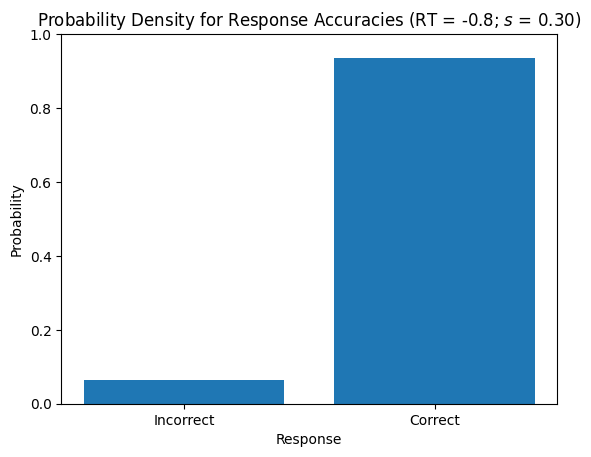

/var/folders/n2/r7k4fm7j4233_5bbbnjfj3700000gn/T/ipykernel_266/1426252809.py:13: RuntimeWarning: invalid value encountered in power
  p =  ((beta/alpha) * (t/alpha)**(beta -1)) / (1 + (t/alpha)**beta)**2


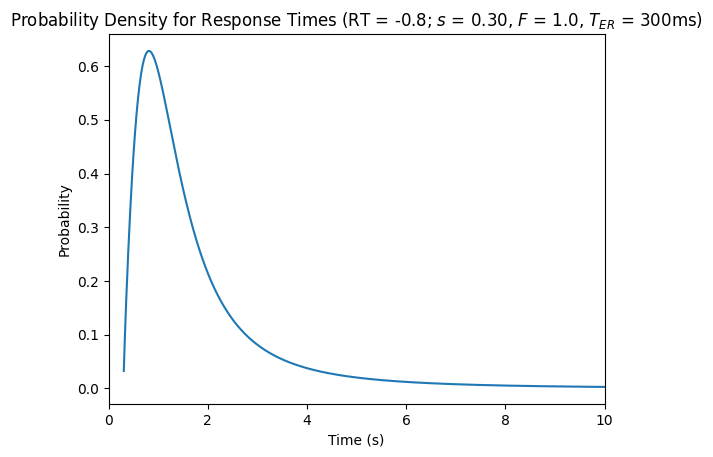

In [21]:
accuracies = np.array((0, 1))
p = [resp_prob(x, 0, -0.8, 0.3) for x in accuracies]
print(p)
plt.bar(["Incorrect", "Correct"], p)
plt.title("Probability Density for Response Accuracies (RT = %.1f; $s$ = %.2f)" % (-0.8, 0.3))
plt.xlabel("Response")
plt.ylim((0,1))
plt.ylabel("Probability")
plt.show()


t = np.linspace(0.1, 10, 1000)
prt = rt_prob(t, activation=0, threshold=-0.8, noise=0.3, f=1, ter=0.3)
plt.plot(t, prt)
plt.title("Probability Density for Response Times (RT = %.1f; $s$ = %.2f, $F$ = %.1f, $T_{ER}$ = %dms)" % (-0.8, 0.3, 1.0, 300))
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.xlim((0, 10))
plt.show()

# Applying MLE 

Here is a walk-thorugh of how MLE works. We start with the Asian Flags data for our test subject, saved in `sdata`. Of this data, we are going to focus only on the presentations pertaining a specific fact, and save this data in `sfdata`. 


In [22]:
sfdata = sdata[sdata.factId == 337301]
sfdata

,userId,lessonId,start,legit,id,screen_name,email,factId,image_file_id,answer,...,given_response,alternatives,model_parameters,sessionId,factText,repetition,textbox_text.text,prior_knowledge,flags_click.time,LastRepetition
5,89328,Asian Flags,1700000000000,False,38778970,user100,user100@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,11,bangladesh,-1,6.7709,11
20,89330,Asian Flags,1700000000000,False,38444568,user102,user102@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,3,maldives,1,4.4090,3
35,89333,Asian Flags,1700000000000,False,38442521,user105,user105@research.com,337301,26346,maldives,...,Bangladesh,NaN,"{""id"":8",NaN,337301,9,NaN,-1,1.6701,9
50,89335,Asian Flags,1700000000000,False,38770906,user107,user107@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,8,turkey,-1,4.2790,8
65,89336,Asian Flags,1700000000000,False,38411848,user108,user108@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,9,NaN,-1,1.7130,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,94546,Asian Flags,1700000000000,False,38856652,user91,user91@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,8,turkey,-1,3.1205,8
1025,94550,Asian Flags,1700000000000,False,38846921,user95,user95@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,5,NaN,-1,4.5966,5
1040,94551,Asian Flags,1700000000000,False,38845056,user96,user96@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,7,NaN,-1,9.6718,7
1055,94554,Asian Flags,1700000000000,False,38839238,user99,user99@research.com,337301,26346,maldives,...,Maldives,NaN,"{""id"":8",NaN,337301,12,thailand,-1,5.3417,12


## Log-likelihood function

Now, we create a _log-likelihood_ function. The function loops for every presentation in `sfdata` (every presentation of a specific fact) and  calculates the probabilities of observing each of the corresponding responses and response times, given a specific set of parameter values. The probabilities are then log-transformed and summed.

In [23]:

def loglikelihood(data, sof, rt, ter, f, noise, blc):
    """Log likelihood"""
    traces = [0.0001]
    start = list(set(data.start))[0]
    LL = 0.0
    for i in range(data.shape[0]):
        event = data.iloc[i, :]
        time = (event["presentationStartTime"] - start)/1000 + offset
        accuracy = event["correct"] 
        resp_time = event["reactionTime"] 
        # Expected activation
        activation = blc + calculate_activation(time, traces, sof)
        
        # Log-likelihoods
        LL += np.log(resp_prob(accuracy, activation, rt, noise))
        LL += np.log(rt_prob(resp_time, activation, rt, noise, f, ter))
                        
        # Add new encoding to traces
        traces.append(time)
    
    return LL
        

For example, here is the log-likelihood of the observed results in `sfdata`:

In [26]:
DATA = data

loglikelihood(DATA, sof=0.3, rt=0.8, ter=0.3, f=1.0, noise=0.2, blc=0.0)

-33077.210235575825

We are interested in using log-likelihood to identify prior knowledge, which is the represented by the base-level constant `BLC` of each fact.  For a given set of presentations of that fact, we are going to find the value of BLC that _maximizes_ the log-likelihood (given the rest of the params).

To do so, we need to using SciPy _minimization_ techniques. Minimization techniques are machine learning tools that find the oarameters that minimize a given function. called the _Loss_ function. In this case, the loss function is a function of one parameter (the value of BLC) that computes the inverse of the log-likelihood (minimize loss = maximize likelihood).

Because the loss function needs to know a participant's SOF, we need to store that in a global variable (it can be changed for other participants)

In [27]:
SOF = 0.3
def loss(params):
    global DATA
    blc = params[0]
    data = DATA
    return -loglikelihood(data, sof=SOF, rt=RT, ter=TER, f=F, noise=S, blc=blc)

Here is an example: The value of BLC that minimizes the current data saved in `sfdata`.

In [28]:
DATA = sfdata
minimize(loss, x0 = [0],
         method="Powell", 
         tol=0.0000001, 
         bounds=[(-3, 3)])

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 162.15887501589617
       x: [ 1.344e+00]
     nit: 2
   direc: [[ 8.467e-09]]
    nfev: 80

We can repeat the procedure for every fact in `sfdata`, and computer their associated BLC:

In [29]:
estimates = []

for fact in set(sdata.answer):
    DATA = sdata[sdata.answer == fact]
    blc = minimize(loss, x0 = [0],
                   method="Powell", 
                   tol=0.0000001, 
                   bounds=[(-10, 10)])
    estimates.append((fact, float(blc.x)))
estimates

/var/folders/n2/r7k4fm7j4233_5bbbnjfj3700000gn/T/ipykernel_266/2670580770.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimates.append((fact, float(blc.x)))


[('martinique', 1.401842337174965),
 ('philippines', 1.5012729475275883),
 ('dominica', 1.429167320664399),
 ('montserrat', 1.3672821833593163),
 ('maldives', 1.3440467483634748),
 ('south korea', 1.5877154741013066),
 ('saudi arabia', 1.618321726825948),
 ('barbados', 1.3826167740099604),
 ('trinidad', 1.5237280865298137),
 ('singapore', 1.3564648664657926),
 ('aruba', 1.4122351004221165),
 ('china', 1.6060413849581177),
 ('haiti', 1.5710744919426316),
 ('jamaica', 1.6104398716837094),
 ('anguilla', 1.3929678032779869),
 ('st kitts and nevis', 1.365999093438809),
 ('bahamas', 1.367680514775814),
 ('japan', 1.6230088416177433),
 ('taiwan', 1.3415415867208478),
 ('nepal', 1.6071913286053174),
 ('grenada', 1.3463875995371573),
 ('cuba', 1.4379228070269345),
 ('vietnam', 1.437524656980888),
 ('st lucia', 1.5308928138781193),
 ('bangladesh', 1.511791528931636),
 ('hong kong', 1.480322448100493),
 ('india', 1.6808922294649815),
 ('sri lanka', 1.547348162551067),
 ('bonaire', 1.3232256868526

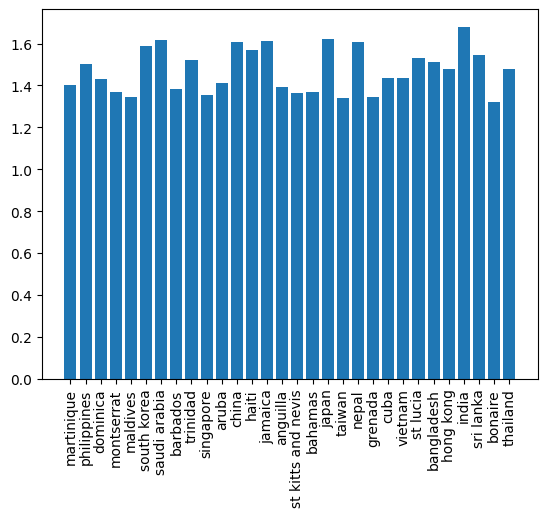

In [30]:
facts = [x[0] for x in estimates]
blcs = [x[1] for x in estimates]
plt.bar(facts, blcs)
plt.xticks(rotation=90)
plt.show()

# Functions for Ally

Here is a function that you can call anytime --- you just need to specify the subject number, the lesson ("Asian Flags" vs "Caribbean Flags") and your best estimate for that subject's SOF (ideally, your mean SOF for the "unknown" data. 

In [32]:
def decode_prior_knowledge(subject, lesson, sof):
    global DATA
    global SOF
    SOF = sof
    sdata = DATA[DATA.userId == subject]  # extract all data for that subject
    sldata = sdata[sdata.lessonTitle == lesson]  # extract all data for that lesson

    estimates = []
    print(set(sldata.answer))
    for fact in set(sldata.answer):
        print(fact)
        DATA = sldata[sldata.answer == fact]  # The DATA global var is accessed by the MLE loss function
        
#        # Get the corresponding prior_knowledge value from sldata
#        prior_knowledge = sldata[sldata.answer == fact]['prior_knowledge'].iloc[0]

        blc = minimize(loss, x0=[0],
                       method="Powell",
                       tol=0.0000001,
                       bounds=[(-10, 10)]).x
        
        estimates.append((fact, float(blc), subject, lesson))
    return pd.DataFrame(estimates, columns=("Fact", "BLC", "Subject", "Lesson"))

In [34]:
results = None

#for sub in set(data.userId):
#    mydata = data[data.userId == sub] # Get all the data for that subject
#    for lesson in set(data.lessonTitle):
        #mysmalldata= mydata[mydata.lessonTitle == lesson]
        #average_alpha = np.mean(mysmalldata.average_alpha)  
#        partial = decode_prior_knowledge(userId, lessonTitle, alpha)
#        if results is None:
#            results = partial
#        else:
#            results = pd.concat([results, partial], ignore_index=True, axis=0)
            
for user_id in set(data.userId):
    user_data = data[data['userId'] == user_id]  # Get all the data for that user
    
    for lesson_title in set(user_data['lessonId']):
        lesson_data = user_data[user_data['lessonId'] == lesson_title]
        partial = decode_prior_knowledge(user_id, lesson_title, 0.3)
        
        if results is None:
            results = partial
        else:
            results = pd.concat([results, partial], ignore_index=True, axis=0)
            


AttributeError: 'DataFrame' object has no attribute 'lessonTitle'

In [ ]:
print(set(data['userId']))

for user_id in set(data['userId']):
    user_data = data[data['userId'] == user_id]  # Get all the data for that user
    
    # Print unique 'lessonTitle' values for the current user to verify
    print(set(user_data['lessonTitle']))
    
    for lesson_title in set(user_data['lessonTitle']):
        lesson_data = user_data[user_data['lessonTitle'] == lesson_title]
        partial = decode_prior_knowledge(user_id, lesson_title, 0.3)
        
        if results is None:
            results = partial
        else:
            results = pd.concat([results, partial], ignore_index=True, axis=0)

In [ ]:

results = decode_prior_knowledge(user_id, lesson_title, 0.3)
results

In [ ]:
results.to_csv("results_MLE.csv")

In [ ]:

custom_order = ["Venza", "Veloster", "Altroz", "Chelsea", "XC40", "CT%20200h", "URX%20NEO", "Q8%20e-tron", "Cherokee", "Explorer"]

plt.bar(results['Fact'], results['BLC'], color='lightblue')  # Set the color to blue
plt.xticks(results['Fact'], custom_order, rotation='vertical')  # Rotates x-axis labels and uses custom order
plt.xlabel('Fact')
plt.ylabel('BLC')
plt.title('Bar Graph with Custom Ordered X-Axis Labels')
plt.tight_layout()
plt.show()

plt.bar(results['Fact'], results['BLC'], color='blue')  # Set the color to blue
plt.xticks(rotation='vertical')  # Rotates x-axis labels vertically
plt.xlabel('Fact')
plt.ylabel('BLC')
plt.title('Bar Graph with Vertical X-Axis Labels')

# Set y-axis limits from 0 to 1
plt.ylim(1, 2)

plt.tight_layout()
plt.show()